In [1]:
%config Completer.use_jedi=False

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn")
import warnings

In [3]:
warnings.filterwarnings("ignore")

In [4]:
df=pd.read_csv('./advertising.csv')

In [5]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [6]:
df.shape

(200, 4)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [8]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [9]:
#checking for null values
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

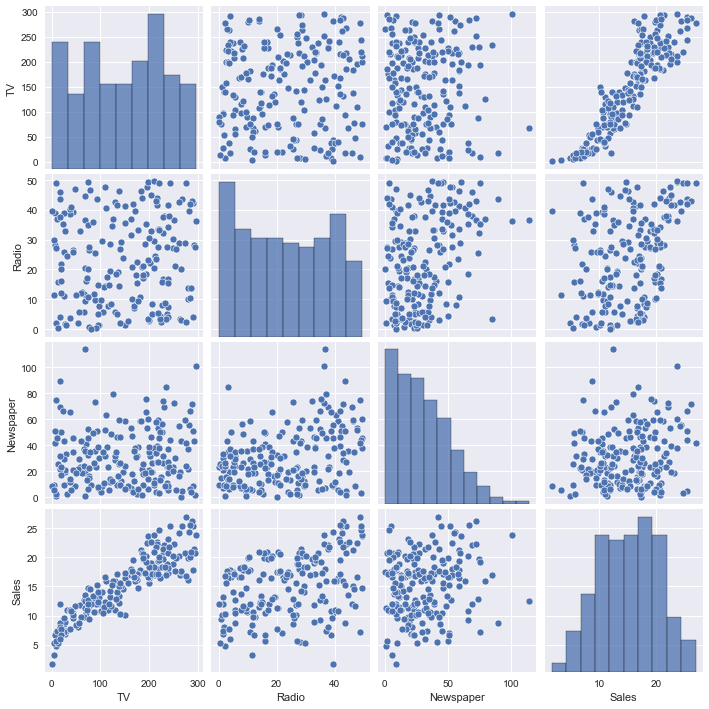

In [10]:
sns.pairplot(data=df)

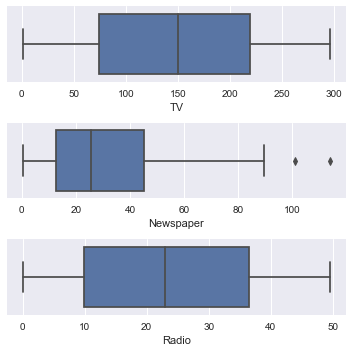

In [11]:
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(df['TV'], ax = axs[0])
plt2 = sns.boxplot(df['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(df['Radio'], ax = axs[2])
plt.tight_layout()

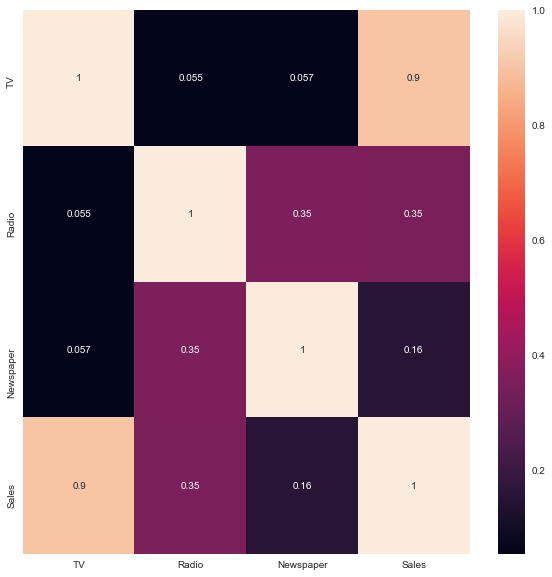

In [12]:
# Let's see the correlation between different variables.
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot = True)
plt.show()

As is visible from the pairplot and the heatmap, the variable TV seems to be most correlated with Sales. So let's go ahead and perform simple linear regression using TV as our feature variable.

In [13]:
X=df['TV']
Y=df["Sales"]

In [14]:
print(X.shape)
print(Y.shape)

(200,)
(200,)


In [15]:
X=X.values
Y=Y.values

In [16]:
X = X.reshape((-1,1))
Y = Y.reshape((-1,1))

In [17]:
#Normalization
X=(X-X.mean())/X.std()

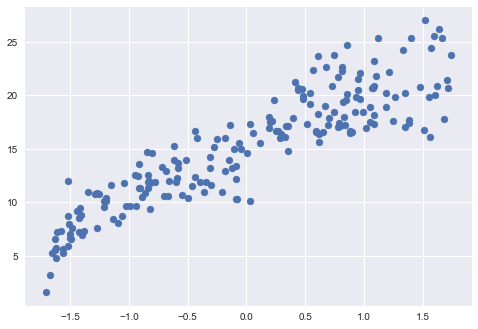

In [18]:
plt.scatter(X,Y)
plt.show()

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [20]:
print(X_train.shape)
print(y_train.shape)

(140, 1)
(140, 1)


In [21]:
print(X_test.shape)
print(y_test.shape)

(60, 1)
(60, 1)


### Building the linear Regression Model

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
model = LinearRegression()

In [24]:
model.fit(X_train,y_train)

LinearRegression()

In [25]:
output = model.predict(X_test)

In [26]:
bias = model.intercept_
coeff = model.coef_

print(bias)
print(coeff)

[14.96922707]
[[4.67126183]]


### Score

In [27]:
model.score(X_train,y_train)

0.8157933136480389

In [28]:
model.score(X_test,y_test)

0.792103160124566

Accuracy of 79% on test data

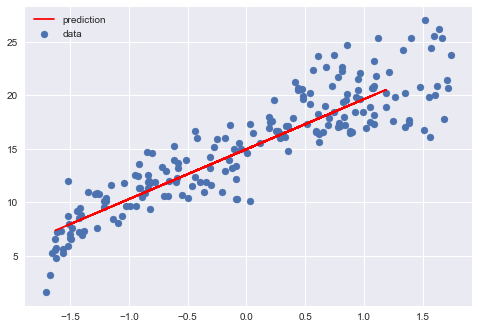

In [33]:
plt.scatter(X,Y,label='data')
plt.plot(X_test,output,color='red',label='prediction')
plt.legend()
plt.show()

In [35]:
y_train_pred = model.predict(X_train)
res = (y_train - y_train_pred)

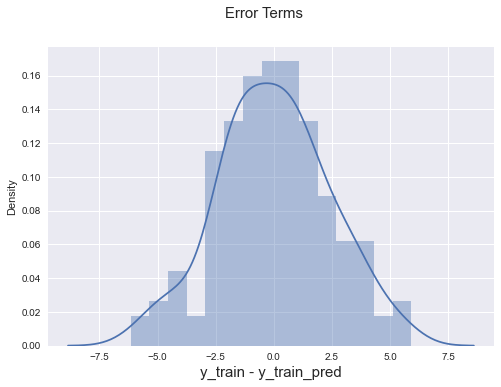

In [36]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()